# Data Mining — Linear Regression — Mini-Project 1 (Energy Consumption)

**Course:** [CSEN911] Data Mining (Winter 2025)  
**Instructor:** Dr. Ayman Alserafi  
**Due:** 24 October 2025, 11:59 PM

**Dataset:** `energy_data.csv`  


> **Instructions:** For every step, write your own explanations and justifications and visualization in the provided Markdown prompts.




***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Farah Ehab

ID:58-4100

Tutorial: 02

---

Name: Zeina Ossama

ID:58-2093

Tutorial: 02

---


The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [31]:
df.head(10)
df.tail()
df.shape
df.isnull().sum()
df.duplicated().sum()
df['Governorate'].value_counts()
df['Neighborhood'].value_counts()
df['Energy_Consumption'].dtype
df['Energy_Consumption'].head()
df['SquareFootage'].dtype
# we were inspecting the data

dtype('O')

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [88]:

df=df.drop_duplicates() # removing duplucates
df['Day_of_Week'] = df['Day_of_Week'].str.capitalize() # Capitalize first letter of each day
df['Neighborhood'] = df['Neighborhood'].str.extract('([a-zA-Z\\s]+)', expand=False).str.strip() # Keep only letters&spaces , remove symbols
df['Average_Temperature']= df['Average_Temperature'].fillna(df['Average_Temperature'].median()) # Fill missing values with median
mapping = {
    'Smouha': 'Alexandria',
    'Gleem': 'Alexandria',
    'Dokki': 'Giza',
    'Mohandessin': 'Giza',
    'New Cairo': 'Cairo',
    'Maadi': 'Cairo',
    'Heliopolis': 'Cairo'
}  # Map neighborhoods to governorates
df['Governorate'] = df['Neighborhood'].map(mapping).fillna('Unknown')
df['Building_Type'] = df['Building_Type'].fillna(df['Building_Type'].mode()[0])  # Fill missing types with most common one
df['SquareFootage'] = df['SquareFootage'].str.replace(r'\s*m2', ' m²', regex=True) # Replace m2 with m²
df['SquareFootage'] = df['SquareFootage'].apply(
    lambda x: x if 'm²' in x else f"{x} m²" # Add m² if missing
)


df['Building_Type'] = df['Building_Type'].fillna(df['Building_Type'].mode()[0])

df['Energy_Consumption'] = df['Energy_Consumption'].astype(str).str.replace('kWh', '', case=False, regex=True)  # Remove kWh text
df['Energy_Consumption'] = pd.to_numeric(df['Energy_Consumption'], errors='coerce') # Convert to numbers
df['Last_Maintenance_Date'] = pd.to_datetime(df['Last_Maintenance_Date'], errors='coerce') # Convert dates to datetime
today = pd.Timestamp.now()
df['Days_since_last_maintenance'] = (today - df['Last_Maintenance_Date']).dt.days # Calculate days since last maintenance
df['Day_of_Week'] = df['Day_of_Week'].str.strip().str.lower() # Clean and lowercase day names
df['Day_type'] = df['Day_of_Week'].apply(
    lambda x: 'weekend' if x in ['saturday', 'sunday'] else 'weekday'
) # Mark weekend or weekday
df['SquareFootage'] = (
    df['SquareFootage']
    .astype(str)
    .str.replace(r'[^0-9\.]', '', regex=True)
) # Keep only numbers from square footage

# Convert SquarFootage to numeric to plot the graph
df['SquareFootage'] = pd.to_numeric(df['SquareFootage'], errors='coerce')
print(df)


      Building_ID Building_Type Governorate Neighborhood Day_of_Week  \
0     BLD-1000-UD   Residential  Alexandria       Smouha   wednesday   
1     BLD-1001-AX    Commercial        Giza  Mohandessin     tuesday   
2     BLD-1002-IH    Industrial       Cairo    New Cairo      sunday   
3     BLD-1003-HE   Residential        Giza        Dokki     tuesday   
4     BLD-1004-XD    Commercial  Alexandria       Smouha      monday   
...           ...           ...         ...          ...         ...   
1095  BLD-2095-OH    Commercial        Giza        Dokki    saturday   
1096  BLD-2096-RH   Residential        Giza        Dokki      sunday   
1097  BLD-2097-JZ    Commercial        Giza  Mohandessin      sunday   
1098  BLD-2098-ZP    Industrial  Alexandria       Smouha    saturday   
1099  BLD-2099-GL   Residential       Cairo    New Cairo      friday   

     Occupancy_Level Appliances_Usage_Level  SquareFootage  \
0               High                    Low           7063   
1          

## Exploratory Data Analysis

**Q1:** What are the most popular neighborhoods? plot all and order them on the graph (mention top 3)

**Visualization**

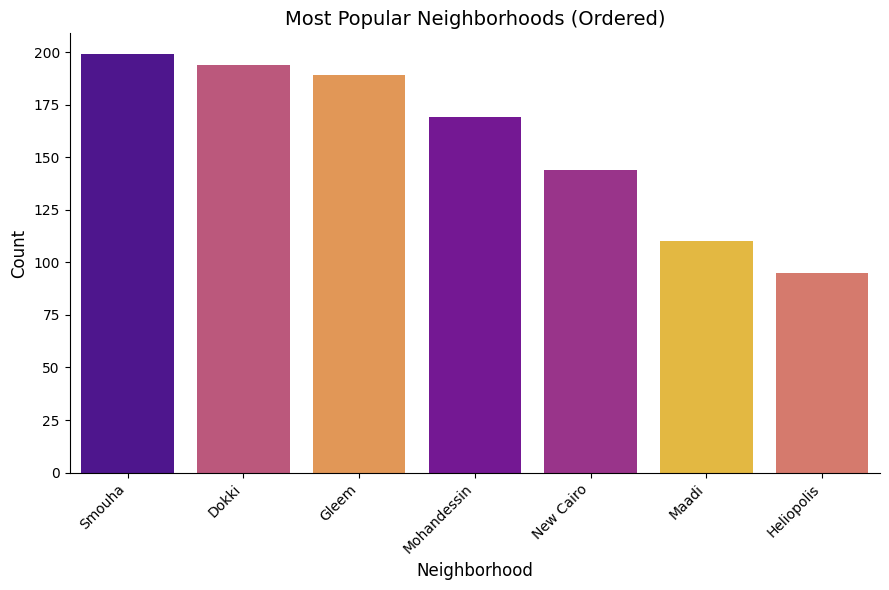

In [3]:
order = df['Neighborhood'].value_counts().index
sns.catplot(
    x='Neighborhood',
    hue='Neighborhood',
    kind='count',
    data=df,
    order=order,
    palette='plasma',
    legend=False,
    height=6, aspect=1.5
)

plt.title('Most Popular Neighborhoods (Ordered)', fontsize=14)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Answer for Q1:** _Your answer here_

> Top 3 are Smouha 199 , Dokki 194 and Gleem 189
explaination: plotting all neighborhoods in a graph and obtaining the top 3 neighborhoods



**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

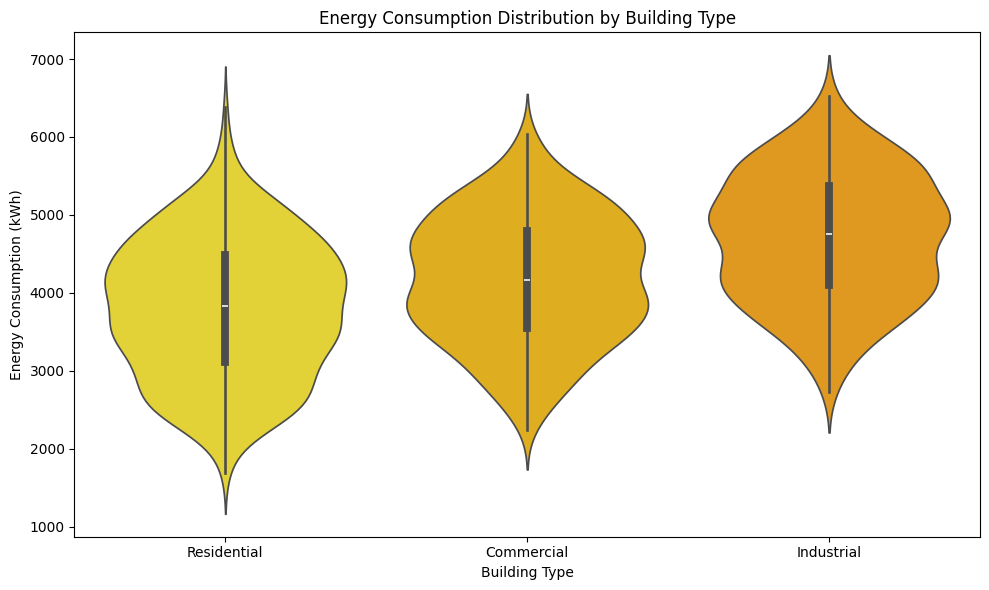

In [30]:
plt.figure(figsize=(10, 6))

sns.violinplot(
    x="Building_Type",
    y="Energy_Consumption",
    hue="Building_Type",
    data=df,
    palette="Wistia",
    legend=False
)

plt.xlabel("Building Type")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Energy Consumption Distribution by Building Type")

plt.tight_layout()
plt.show()

**Answer for Q2:** _Your answer here_
widest distribution of energy consumption?
Residential
the highest consumption?.
Industrial
Explaination: plotting the building types with the energy consumption and determining which has the widest distribution based on the longest or tallest graph and which has the highest consumption bas on the highest midpoint

**Q3:** How does the building size affect energy consumption?

**Visualization**

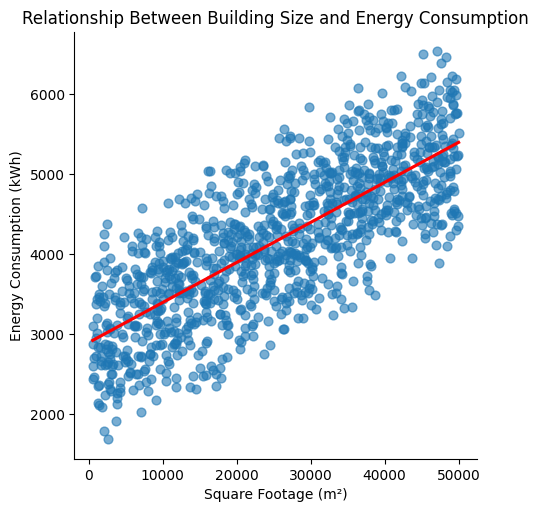

In [63]:
sns.lmplot(
    data=df,
    x='SquareFootage',
    y='Energy_Consumption',
    scatter_kws={'alpha':0.6, 's':40},
    line_kws={'color':'red'},
    ci=None
)

plt.title('Relationship Between Building Size and Energy Consumption')
plt.xlabel('Square Footage (m²)')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

**Answer for Q3:** _Your answer here_
As the square footage increases(the building size) the energy consumption of the building increases

**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

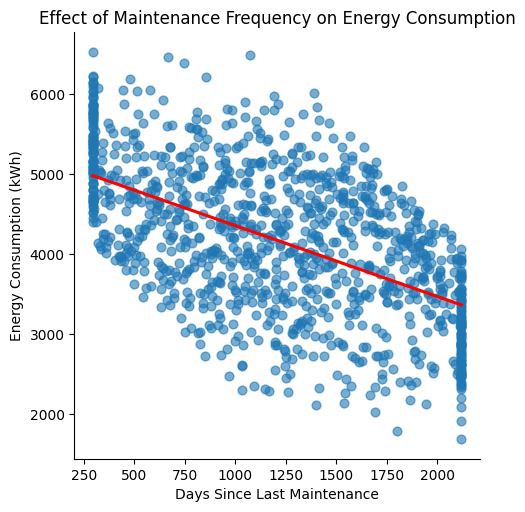

In [64]:
sns.lmplot(
    data=df,
    x='Days_since_last_maintenance',
    y='Energy_Consumption',
    scatter_kws={'alpha':0.6, 's':40},
    line_kws={'color':'red'},
    ci=None
)

plt.title('Effect of Maintenance Frequency on Energy Consumption')
plt.xlabel('Days Since Last Maintenance')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

**Answer for Q4:** _Your answer here_
NO, as the days since last maintenace are lower the energy consumption is higher and when the days are higher the lower the energy consumption is

**Q5:** Are all the numerical variables normally distributed, or is there any skewness?

**Visualization**

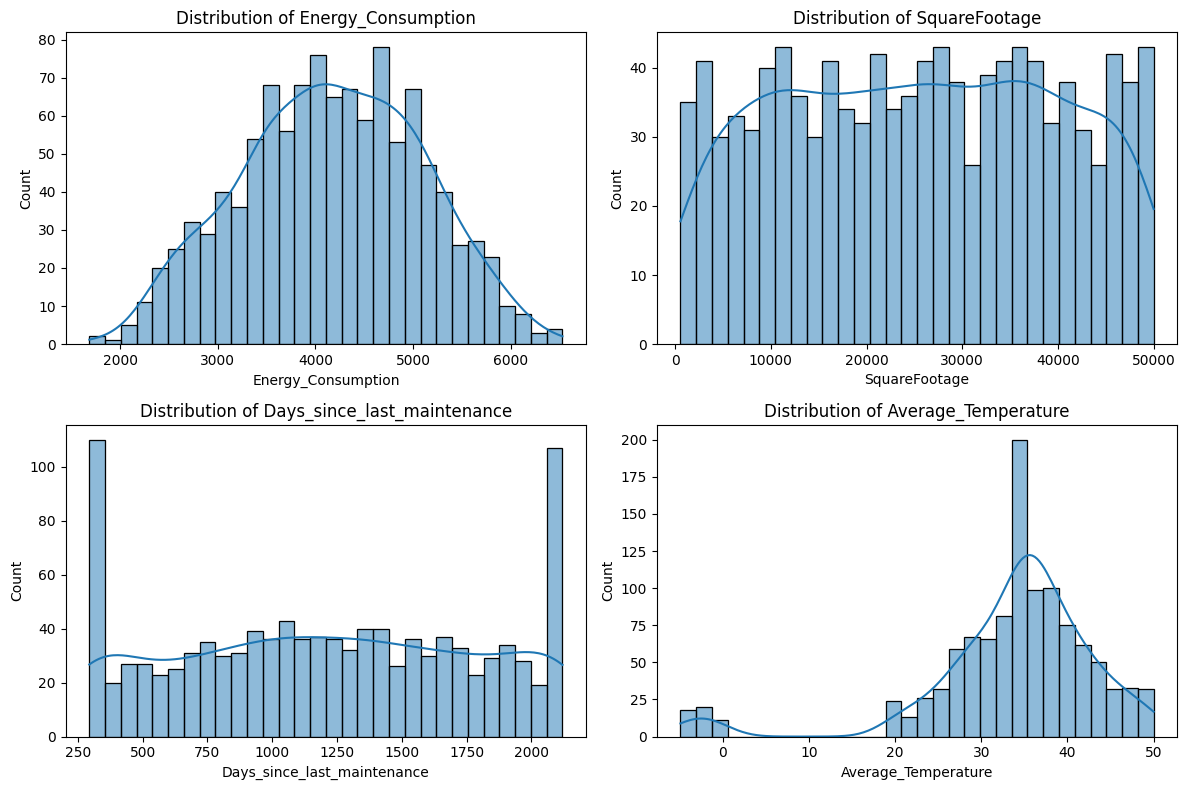

In [66]:
num_cols = ['Energy_Consumption', 'SquareFootage', 'Days_since_last_maintenance', 'Average_Temperature']

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

**Answer for Q5:** _Your answer here_
Only the energy_consumption is normally distributed and the other 3 graphs are not normally distributed

**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this
dataset?

**Visualization**

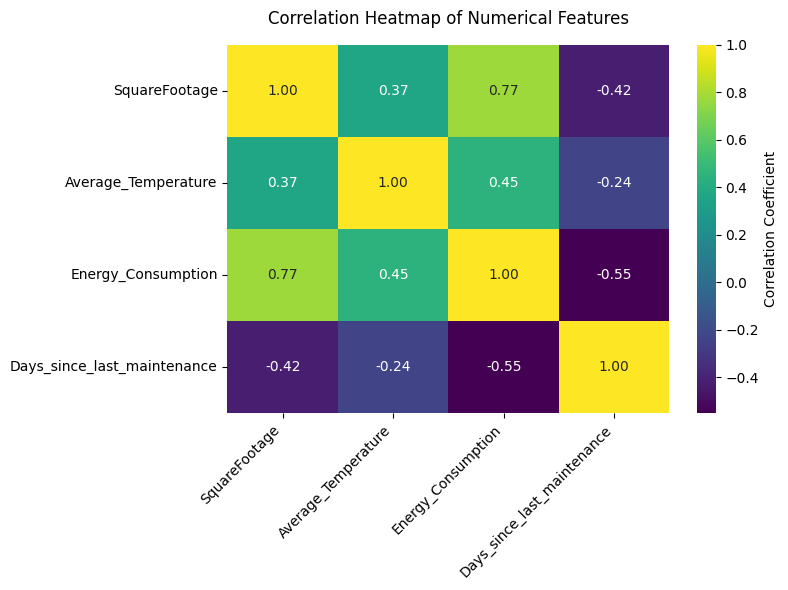

In [71]:
num_df = df.select_dtypes(include=['int64', 'float64', 'Int64'])

corr = num_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    cmap='viridis',
    annot=True,
    fmt=".2f",
    annot_kws={"size": 10},
    cbar_kws={'label': 'Correlation Coefficient'}
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Correlation Heatmap of Numerical Features", fontsize=12, pad=15)
plt.tight_layout()
plt.show()

**Answer for Q6:** _Your answer here_
Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other. Because it causes unstable coefficients and makes it difficult to determine the effect of correlated variables. Yes it does exist in this data set because the heatmap shows a strong positive correlation (0.77) between SquareFootage and Energy_Consumption, a moderate positive correlation (0.45) between Average_Temperature and Energy_Consumption, and a moderate negative correlation (-0.55) between Days_since_last_maintenance and Energy_Consumption.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [89]:
selected_features = [
    'Building_Type',
    'Governorate',
    'Occupancy_Level',
    'Appliances_Usage_Level',
    'SquareFootage',
    'Average_Temperature',
    'Days_since_last_maintenance',
    'Day_type'
]  # select the main features for the model

cat_features = ['Building_Type', 'Governorate', 'Occupancy_Level', 'Appliances_Usage_Level', 'Day_type']  # list of categorical columns

df_model = df[selected_features + ['Energy_Consumption']]  # keep only selected features and target

df_encoded = pd.get_dummies(
    df_model,
    columns=cat_features,
    drop_first=True,
    dtype='int8'
)  # encode categorical features using one-hot encoding

print(df_encoded.head())  # show first few rows
print("\nShape:", df_encoded.shape)  # show dataset shape

y = df_encoded['Energy_Consumption']  # define target variable
X = df_encoded.drop(columns=['Energy_Consumption'])  # define independent variables

from sklearn.preprocessing import MinMaxScaler  # import scaler
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns  # select numeric columns

scaler = MinMaxScaler()  # create MinMax scaler
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])  # scale numeric columns to [0,1]

from sklearn.model_selection import train_test_split  # import split function

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)  # split data into 80% train and 20% test



   SquareFootage  Average_Temperature  Days_since_last_maintenance  \
0           7063                28.61                         2120   
1          44372                35.26                         1335   
2          19255                37.88                         1702   
3          13265                35.06                          814   
4          13375                28.82                         1166   

   Energy_Consumption  Building_Type_Industrial  Building_Type_Residential  \
0             2713.95                         0                          1   
1             5744.99                         0                          0   
2             4101.24                         1                          0   
3             3009.14                         0                          1   
4             3279.17                         0                          0   

   Governorate_Cairo  Governorate_Giza  Occupancy_Level_Low  \
0                  0                 0         

## Modelling

_Apply the linear regression model below._

In [90]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()  # create model object

lin_reg.fit(X_train, y_train);  # train the model on training data

parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(X_train.shape[1])]  # create parameter names

columns = ['y-intercept'] + list(X_train.columns.values)  # match parameters with feature names

sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))  # store intercept and coefficients

parameter_df = pd.DataFrame({
    'parameter': parameter,
    'column': columns,
    'theta_value': sk_theta
})  # create table showing model parameters and values

parameter_df  # display parameter dataframe

,parameter,column,theta_value
0,theta_0,y-intercept,3657.866557
1,theta_1,SquareFootage,2370.883573
2,theta_2,Average_Temperature,110.497909
3,theta_3,Days_since_last_maintenance,-128.593585
4,theta_4,Building_Type_Industrial,464.837328
5,theta_5,Building_Type_Residential,-377.354132
6,theta_6,Governorate_Cairo,-24.701703
7,theta_7,Governorate_Giza,-33.967890
8,theta_8,Occupancy_Level_Low,-644.728887
9,theta_9,Occupancy_Level_Medium,-329.655719


## Model Evaluation

Evaluate the model you applied.

In [91]:
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test, y_pred)  # calculate RMSE

R_square = lin_reg.score(X_test, y_test)  # calculate R² score

print('The root mean square error (RMSE) is: ', rmse)  # show RMSE result
print('R^2 obtained is:', R_square)  # show R² result

from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error  # import more metrics

mape = mean_absolute_percentage_error(y_test, y_pred)  # calculate MAPE
mae = median_absolute_error(y_test, y_pred)  # calculate MAE

print('The mean absolute percentage error (MAPE) is: ', mape)  # show MAPE result
print('The median absolute error (MAE) is: ', mae)  # show MAE result

The root mean square error (RMSE) is:  216.09943880160742
R^2 obtained is: 0.9450994491238477
The mean absolute percentage error (MAPE) is:  0.040692174445220754
The median absolute error (MAE) is:  130.31166812689935


## Conclusion and Recommendations

Comment on the model performance and your findings from model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for an electrcity company aiming to estimate the energy levels of each building?

**Answer**: your answer here.
The linear regression model shows only moderate accuracy, with some errors.
Possible issues include non-linear relationships, multicollinearity, and skewed data.
To improve performance, we should try non-linear models.overall, this model is not reliable enough for accurately estimating building energy consumption.